In [3]:
from pyimagesearch.nn import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import datasets
import keras.backend as k
import matplotlib.pyplot as plt
import numpy as np

In [16]:
print("[INFO] accessing MNIST...")
dataset = datasets.mnist.load_data()

[INFO] accessing MNIST...


In [17]:
(trainX, trainY), (testX, testY) = dataset
trainX, testX = trainX/255.0, testX/255.0

In [24]:
trainX.shape

(60000, 28, 28)

In [25]:
if k.image_data_format() == "channels_first":
    trainX = trainX.reshape(trainX.shape[0], 1, 28, 28)
    testX = testX.reshape(testX.shape[0], 1, 28, 28)
    # otherwise, we are using "channels last" ordering, so the design
    # matrix shape should be: num_samples x rows x columns x depth
else:
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)

In [26]:
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [27]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

n_epochs = 20

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=n_epochs, verbose=1)

[INFO] compiling model...
[INFO] training network...
Epoch 1/20
469/469 [==============================] - 47s 100ms/step - loss: 0.9555 - accuracy: 0.7400 - val_loss: 0.3034 - val_accuracy: 0.9117
Epoch 2/20
469/469 [==============================] - 52s 111ms/step - loss: 0.2637 - accuracy: 0.9220 - val_loss: 0.2012 - val_accuracy: 0.9415
Epoch 3/20
469/469 [==============================] - 49s 104ms/step - loss: 0.1874 - accuracy: 0.9446 - val_loss: 0.1461 - val_accuracy: 0.9583
Epoch 4/20
469/469 [==============================] - 49s 104ms/step - loss: 0.1472 - accuracy: 0.9567 - val_loss: 0.1228 - val_accuracy: 0.9627
Epoch 5/20
469/469 [==============================] - 48s 103ms/step - loss: 0.1194 - accuracy: 0.9645 - val_loss: 0.1014 - val_accuracy: 0.9721
Epoch 6/20
469/469 [==============================] - 48s 103ms/step - loss: 0.1011 - accuracy: 0.9699 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 7/20
469/469 [==============================] - 49s 103ms/step - loss: 

In [28]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in le.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



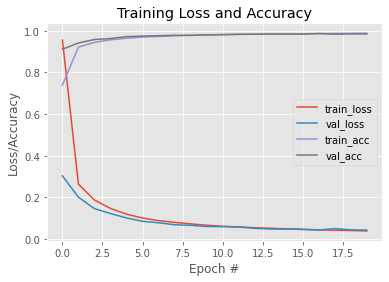

In [30]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()